In [1]:
import pandas as pd
import os

raw_path = "../data/raw/"
all_data = []

for file in os.listdir(raw_path):
    if file.endswith(".csv"):
        year = ''.join([c for c in file if c.isdigit()]) or "unknown"
        df = pd.read_csv(os.path.join(raw_path, file))
        df["Year"] = year
        all_data.append(df)

final_df = pd.concat(all_data, ignore_index=True)
final_df.to_csv("../data/processed/nirf_combined.csv", index=False)

print("✅ Combined all years into one dataset!")

✅ Combined all years into one dataset!


In [4]:
# Drop all non-numeric columns
final_df = final_df.drop(["Institution Name", "Institution Code", "Institute Name", "Institute Code"], axis=1)

# Convert Year to numeric (if it's still string)
final_df["Year"] = pd.to_numeric(final_df["Year"], errors="coerce")

# Define features & target
X = final_df.drop("PR", axis=1)
y = final_df["PR"]

In [6]:
# Drop non-numeric columns safely (no KeyErrors)
final_df = final_df.drop(
    columns=[col for col in ["Institution Name", "Institution Code", "Institute Name", "Institute Code"] if col in final_df.columns]
)

# Convert 'Year' to numeric if it's not
if final_df["Year"].dtype == "object":
    final_df["Year"] = pd.to_numeric(final_df["Year"], errors="coerce")

# Separate features and target
X = final_df.drop("PR", axis=1)
y = final_df["PR"]

# Verify all numeric now
print(final_df.dtypes)

SS      float64
FSR     float64
FQE     float64
FRU     float64
OE      float64
PU      float64
QP      float64
IPR     float64
FPPP    float64
GUE     float64
GPHD    float64
RD      float64
WD      float64
ESCS    float64
PCS     float64
PR       object
Year      int64
dtype: object


PR      1.000000
PU      0.167560
IPR     0.092297
SS      0.091364
GPHD    0.076491
OE      0.073082
RD      0.028946
FQE     0.028762
PCS     0.027719
ESCS    0.022503
FPPP    0.021137
GUE     0.020204
QP      0.018092
WD      0.006349
FRU    -0.009526
Year   -0.019764
FSR    -0.036869
Name: PR, dtype: float64


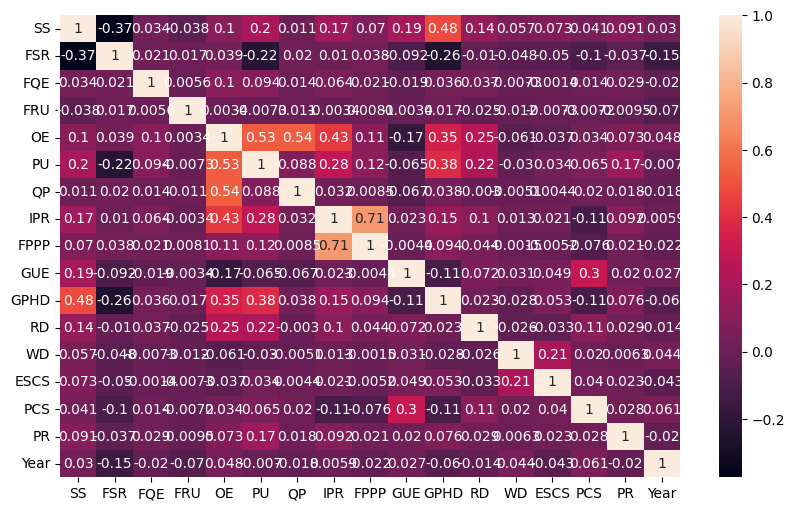

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = final_df.corr()
print(corr["PR"].sort_values(ascending=False))

# Optional: visualize
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()


In [14]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
print("R² Score:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))


R² Score: -17.161462118333144
MAE: 12.34365725265195


In [15]:
# Convert PR to numeric
final_df = final_df.copy()  # ensures we have a fresh DataFrame
final_df.loc[:, "PR"] = pd.to_numeric(final_df["PR"], errors="coerce")


# Drop rows where PR is NaN
final_df = final_df.dropna(subset=["PR"])

# Define features and target
X = final_df.drop("PR", axis=1)
y = final_df["PR"]

#add before 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
pred = model.predict(X_test)

# Evaluate
print("✅ Model trained successfully!")
print("R² Score:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))

✅ Model trained successfully!
R² Score: 0.09605096702495741
MAE: 7.544910208333334


In [3]:
final_df.select_dtypes(include=['object']).columns


Index(['Institution Name', 'Institution Code', 'PR', 'Year', 'Institute Name',
       'Institute Code'],
      dtype='object')